In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import make_blobs, make_classification

In [20]:
X, y = make_blobs(n_samples=100,n_features=2, centers= 2 , random_state=42, cluster_std= 3)
X[:,1] = X[:,1] + 100

### Dataset:

I created a dataset with 2 classes and 2 features. 
Intentionally, I made feature 2 has a much higher value than feature 1.

__Note:__ the different scale of the x and y-axis.

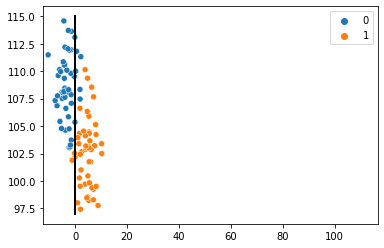

In [65]:
plt.figure(facecolor='white')
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.xlim([X.min()-2,X.max()+2])
plt.plot([0, 0],[97, 115],color='black',linewidth=2)

In [68]:
print(f" The mean of the voxels across Rows / Conditions : {X.mean(axis=0)}")

 The mean of the voxels across Rows / Conditions : [  0.72754092 105.60268951]


__Note:__ The 2 features are lying in very different spatial scales. 
- __Feature 1:__ between -10 and + 10 
- __Feature 2:__ between  97 and  115

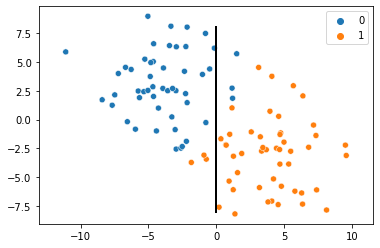

In [64]:
demeaned_X = X - X.mean(axis=0)
plt.figure(facecolor='white')
sns.scatterplot(x=demeaned_X[:,0],y=demeaned_X[:,1],hue=y)
plt.xlim([demeaned_X.min()-2,demeaned_X.max()+2])
plt.plot([0, 0],[-8, 8],color='black',linewidth=2)
plt.show()

# Why do we do demeaning (or normalization) across conditions (Rows)

__In visual terms:__

1 - Normalizing features allow for the classifier to have a better seperation plane between different conditions. 
    e.g. Imagine the classifier moves a little bit (in the x-axis or y-axis , or in both dimensions (rotating 20 degrees)). 
    
    In the un-normalized case, a very slight small shift in the classifier will strongly and massively affect the seperation of the two classes. 
    
    Oppositely, in the normalized case, a shift in the classifier will not strongly affect the seperation of the two classes --> better seperation --> better results. 
    
__In Machine learning terms:__

    Normalizing the features allows the classifier to find the optimial classification parameters both faster and more accurate/seperable. 


## How do we apply demeaning across conditions (Rows)? 

Note: we can't apply demeaning across conditions using the test cases (because in real life we dont know what the test cases are, we dont have them yet)

Steps: 
1. Divide the data into training and testing data 
2. Calculate the mean of the training data (across Rows/Conditions). In this example it was : [__0.728__ and __105.6__].
3. We train the classifier on the training data
4. Now we get the test data --> but before trying to predict --> we need to apply the same transformation paramters(demeaning). 
5. For test conditions --> we subtract the mean (that was estimated from the training)
    
            Test features - mean estimated from the training [ 0.728 and 105.6]
    
    
6. We use the trained classifier on our transformed test data and apply the predictions. 

## When do we do demeaning across conditions (Rows)? 

- The demeaning or normalization across __Conditions/Rows__ happens in __ALL__ classification analysis but __ONLY__ on the __TRAINING data__. 
- The learnt parameters are __then applied__ to the __test data.__ 
- Then testing is performed.

__N.B:__ 
- The across condition demeaining is applied automatically in libSVM.
- Also this option is usually allowed to be specified in the software you use to perform demeaning/normalization in training, and is then applied automatically to the test. 
- I was speaking here about demeaining because this is easier during explanaiton, but you can also apply normalization (remove the mean and divide by the standard deviation). It is usually allowed to use demeaning or normalization.


## SUMMARY 
 - This step should __NEVER__ be skipped (except with certain classifiers (like decision-trees) where normalization is not required, but we dont use these classifiers in fMRI). So in fMRI and linear classifiers (SVM, LDA) it should never be skipped. 
 
 - Deameaning across __Conditions/Rows__ happens in __EVERY__ classification analysis __ONLY__ on the training data and later applied to the test data.
 

#### So that closes the Across-condition/Row demeaning. Its always done no matter what on the training data. 




# THEN WHAT ABOUT PATTERN DEAMEANING (ACROSS VOXEL/COLUMN) Demeaning? 

In situation where you have different modalities (visual, auditory), the general activation is so different. So the multi-dimensional space are also different.

Text(0, 0.5, 'Activity')

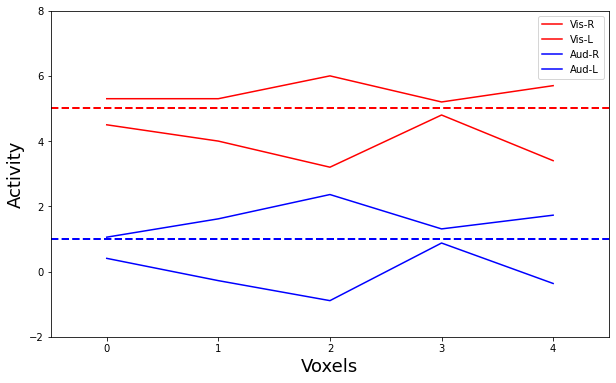

In [166]:
Vis = np.array([[ 5.3  ,5.3, 6, 5.2, 5.7],
                [ 4.5,  4, 3.2, 4.8, 3.4]])
Aud = Vis - 4 + np.random.randn(2,5)*0.2

# Patterns = np.concatenate((Vis,Aud),axis=0)
plt.figure(figsize=(10,6))
plt.plot(Vis.T,color='r')
plt.plot(Aud.T,color='b')
plt.ylim([-2, 8])
plt.xlim([-0.5, 4.5])
plt.plot([-0.5, 4.5],[5, 5],linewidth=2,color='r',linestyle='--')
plt.plot([-0.5, 4.5],[1, 1],linewidth=2,color='b',linestyle='--')

plt.legend(['Vis-R','Vis-L','Aud-R','Aud-L'])
plt.xlabel('Voxels',fontsize=18)
plt.ylabel('Activity',fontsize=18)

__Visual classifier:__
Lets train a classifier to discriminate Right and Left in Vision. The visual classifier is the dashed red line. 

__Auditory classifier:__
Lets train a classifier to discriminate Right and Left in Audition. The auditory classifier is the dashed red line. 

__Cross-modal classifer:__
Can you use the classifier trained on vision and use it on predicting patterns in audition?
No, because these are 2 very different spaces. 

__Solution:__
We need to find a way to make all patterns lie in the same space so we can use a classifer from one modality on another without a problem. 

__What if we demean every pattern across voxels (columns)?__
Then each single pattern will be around zero and we can have no problem switching modalities

In [168]:
Vis_demeaned = Vis - np.expand_dims(Vis.mean(axis=1),0).T
Aud_demeaned = Aud - np.expand_dims(Aud.mean(axis=1),0).T

Text(0.5, 1.0, 'Auditory patterns demeaned')

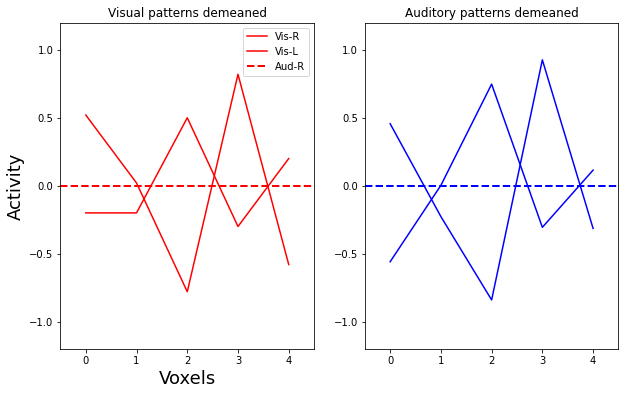

In [171]:
# Patterns = np.concatenate((Vis,Aud),axis=0)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(Vis_demeaned.T,color='r')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 4.5])
plt.plot([-0.5, 4.5],[0,0],linewidth=2,color='r',linestyle='--')
plt.legend(['Vis-R','Vis-L','Aud-R','Aud-L'])
plt.xlabel('Voxels',fontsize=18)
plt.ylabel('Activity',fontsize=18)
plt.title('Visual patterns demeaned')
plt.subplot(1,2,2)
plt.plot(Aud_demeaned.T,color='b')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 4.5])
plt.plot([-0.5, 4.5],[0,0],linewidth=2,color='b',linestyle='--')
plt.title('Auditory patterns demeaned')


### Before demeaning 
- Visual and auditory patterns are in a very different multi-dimensional space.
- A separting hyper-plane on one modality will not fit the space of the other modality.
- If you do cross-modal classifcation without having a common space, you dont know whether:
    - There is no shared information in reality. 
    - Maybe there is, but we couldnt pick up because the different modalities are in very different spaces.

### After demeaning 
- After demeaning, the visual patterns are in the same space as the auditory patterns (all and each one of them is centered around zero)

- Note that the shape of the demeaned pattern is the same as before the demeaning. Same shape and same relation between voxels -> just the whole pattern as a whole moved down or up to be centered around zero. ( This is compared from demeaning across Rows/Conditions where shape can change)

- Now that the pattern are in the same space/magnitude (Centered around zero), you have better chances of training on one modality and successfully predicting the other modality. 

__Note:__ The 2D linear classifier boundary (Dashed line) in the demeaned figure doesnt correctly represent the real classifer. The real classifier is in 4 Dimensions since we have 4 voxels/features. 

- The take-home message is that the classifer on deameaned visual conditions will have the same effect on the auditory conditions after demeaning.  

## GLOBAL SUMMARY : 

### So what should I do in my dataset ? 

### Is your dataset in the same modality?   
#### YES !!
- No Voxel-wise demeaning (across voxels/columns). Forget it. 
- Start your normal classification analysis:
    - Inside the normal classification analysis: you will have across-condition normalization across conditions/Rows that will estimated on the training data.
    - These paramteres will be automatically applied to the test data. 
    - The classifer will then predict the test data after normalization. 
    

### Is your dataset in the same modality?   
#### NO !! I am expecting different activation levels for different modalities
- You should consider applying Voxel-wise demeaning (across voxels/columns) to get the different modalities in the same space. Each single pattern will be centered around zero. 
- Start your normal classification analysis:
    - Inside the normal classification analysis: you will have across-condition normalization across conditions/Rows that will estimated on the training data.
    - These paramteres will be automatically applied to the test data. 
    - The classifer will then predict the test data after normalization. 
    

## FAQ

#### When you use demeaning for Crossmodal decoding, what are you demeaning exactly ?
Demeaning each single pattern independantly across voxels/columns to be centered around zero. 

#### Do you take out the mean « beta » values (or t-maps for you I guess) across voxels for each trial of each condition (eg. trial 1 of auditory left) ? So you have 1 mean beta value per beta and subtract it to each beta before giving it to the classifier?
Yes.

#### Or do you take out the mean beta value across voxels & across trials of one same condition (eg. Auditory left) ? So then you have 1 mean beta value across all auditory left trials, and take that mean value out of each single trial beta?
No

#### Or do you do this but mean across voxels & across trials of the same modality (eg. All auditory trials) ? So then you have 1 mean beta value across all auditory trials? 
No


### EXAMPLE DATASET 
- 2 Modalities: Vision/Audition
- 2 Conditions: Right/Left
- 3 repetitions


In [270]:
df = pd.DataFrame(np.concatenate((Vis,
                Vis*0.99,
                Vis*1.05,
                Aud,
                Aud*0.99,
                Aud*1.05),axis=0),columns=['Voxel_1','Voxel_2','Voxel_3','Voxel_4','Voxel_5'])

df_detailed = df.copy()
df_detailed['Modality'] = ['Vision' for i in range(6)] + ['Audition' for i in range(6)]
df_detailed['Condition'] = ['Right','Right','Right','Left','Left','Left']*2 
df_detailed['Repetition'] = [1,2,3]*4 

df_detailed

,Voxel_1,Voxel_2,Voxel_3,Voxel_4,Voxel_5,Modality,Condition,Repetition
0,5.300000,5.300000,6.000000,5.200000,5.700000,Vision,Right,1
1,4.500000,4.000000,3.200000,4.800000,3.400000,Vision,Right,2
2,5.247000,5.247000,5.940000,5.148000,5.643000,Vision,Right,3
3,4.455000,3.960000,3.168000,4.752000,3.366000,Vision,Left,1
4,5.565000,5.565000,6.300000,5.460000,5.985000,Vision,Left,2
5,4.725000,4.200000,3.360000,5.040000,3.570000,Vision,Left,3
6,1.054945,1.617047,2.361674,1.308028,1.728907,Audition,Right,1
7,0.405010,-0.278300,-0.891365,0.875198,-0.365106,Audition,Right,2
8,1.044396,1.600876,2.338057,1.294947,1.711618,Audition,Right,3
9,0.400960,-0.275517,-0.882451,0.866446,-0.361455,Audition,Left,1


Text(0.5, 1.0, 'After demeaning')

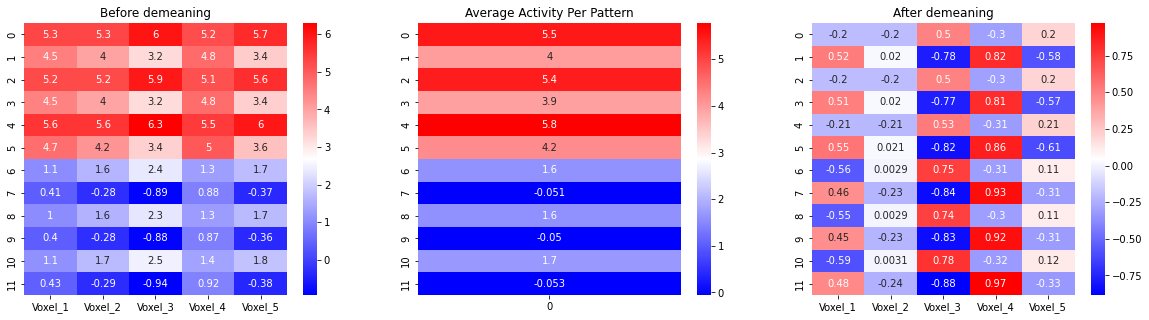

In [262]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.heatmap(df,cmap='bwr',annot=True)
plt.title('Before demeaning')

plt.subplot(1,3,2)
df_mean = pd.DataFrame(df.mean(axis=1))
sns.heatmap(df_mean,cmap='bwr',annot=True)
plt.title('Average Activity Per Pattern')

# plt.figure()
plt.subplot(1,3,3)
df_mean = pd.concat(([pd.DataFrame(df.mean(axis=1))]*5),axis=1)
df_mean.columns=['Voxel_1','Voxel_2','Voxel_3','Voxel_4','Voxel_5']
sns.heatmap(df-df_mean,cmap='bwr',annot=True)
plt.title('After demeaning')


## NOTE

- The mean activity pattern is estimated for each pattern in each condition seperately. Each single pattern is a seperate entity. 
- Notice that after the demeaning, each pattern (row) has both red and below color --> Because each single pattern is centered around zero. So some voxels are above zero and some below. The important thing is that shape is preserved but centered around zero. 
